<a href="https://colab.research.google.com/github/HARIPRIYA-GITHUB/IMAGE-CLASSIFICATION-USING-ML/blob/main/IMAGE_CLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!pip install ipython-autotime
%load_ext autotime

time: 217 µs (started: 2021-05-24 10:30:08 +00:00)


In [8]:
!pip install bing-image-downloader

time: 2.52 s (started: 2021-05-24 10:30:08 +00:00)


In [9]:
!mkdir images

mkdir: cannot create directory ‘images’: File exists
time: 117 ms (started: 2021-05-24 10:30:10 +00:00)


In [10]:
from bing_image_downloader import downloader
downloader.download("sunflowers",limit=30,output_dir='images',
                    adult_filter_off=True)



[!!]Indexing page: 1

[%] Indexed 10 Images on Page 1.


[%] Downloading Image #1 from https://www.hdwallpapers.in/download/closeup_photo_of_sunflower_with_shallow_focus_red_and_yellow_sky_during_sunset_4k_hd_flowers-1280x720.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://hdlatestwallpaper.com/wp-content/themes/sahifa/download.php?fname=Summer-Sunflowers-HD-wallpaper-640x1136.jpg&amp;act=download&amp;edmc=14944&amp;path=http://hdlatestwallpaper.com/wp-content/uploads/2017/10/Summer-Sunflowers-HD-wallpaper-640x1136.jpg
[!] Issue getting: http://hdlatestwallpaper.com/wp-content/themes/sahifa/download.php?fname=Summer-Sunflowers-HD-wallpaper-640x1136.jpg&amp;act=download&amp;edmc=14944&amp;path=http://hdlatestwallpaper.com/wp-content/uploads/2017/10/Summer-Sunflowers-HD-wallpaper-640x1136.jpg
[!] Error:: HTTP Error 403: Forbidden
[%] Downloading Image #2 from http://www.hdwallpapers.in/download/sunflowers_landscape-1920x1080.jpg
[%] File Downloaded !

[%] Downloading Im

In [11]:
downloader.download("cricketball",limit=30,output_dir='images',
                    adult_filter_off=True)



[!!]Indexing page: 1

[%] Indexed 10 Images on Page 1.


[%] Downloading Image #1 from https://www.rebelsport.co.nz/globalassets/productimages/rebel/8139945/8139945_default_1.jpg?CatalogContentThumb-254538-150-150-58-0,0
[%] File Downloaded !

[%] Downloading Image #2 from http://afternooncrumbs.com/wp-content/uploads/2014/07/DSC_0455.jpg
[!] Issue getting: http://afternooncrumbs.com/wp-content/uploads/2014/07/DSC_0455.jpg
[!] Error:: [Errno 104] Connection reset by peer
[%] Downloading Image #2 from http://www.transparentpng.com/thumb/cricket-ball/MZq5al-cricket-ball-photos.png
[%] File Downloaded !

[%] Downloading Image #3 from https://d.ibtimes.co.uk/en/full/1411432/phil-hughes-cricket.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://static.vecteezy.com/system/resources/previews/000/219/217/original/cricket-theme-background-vector.jpg
[%] File Downloaded !

[%] Downloading Image #5 from http://hockeygods.com/system/gallery_images/8396/normal.jpg?1336107347
[%] Fil

In [12]:
downloader.download("ice cream cone",limit=30,output_dir='images',
                    adult_filter_off=True)



[!!]Indexing page: 1

[%] Indexed 10 Images on Page 1.


[%] Downloading Image #1 from http://www.anothersomething.org/wp-content/uploads-anothersomething/2014/04/58_MG_1877-new-brighton-copy.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://www1.pictures.zimbio.com/bg/Monica+daughter+Saint+Tropez+1JAn2pd_wl7x.jpg
[%] File Downloaded !

[%] Downloading Image #3 from http://heavenlycakepops.com/wp-content/uploads/2013/07/image-6sm-767x1024.jpg
[%] File Downloaded !

[%] Downloading Image #4 from http://4.bp.blogspot.com/_MHtRnLjgdiI/TNGQwyNbfOI/AAAAAAAAACo/WkyX4DSIin4/s1600/ice-cream+(1).jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://s3.thcdn.com/productimg/0/960/960/13/10602613-1334850924-673817.jpg
[%] File Downloaded !

[%] Downloading Image #6 from http://www.whoinventedit.net/wp-content/uploads/2009/09/IceCream.jpg
[%] File Downloaded !

[%] Downloading Image #7 from http://newyork.seriouseats.com/assets_c/2009/09/20080917-sugarrush-sundae-thumb-6

In [13]:
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

target = []
images = []
flat_data = []

DATADIR ='/content/images'
CATEGORIES =['sunflowers','cricketball','ice cream cone']

for category in CATEGORIES:
  class_num = CATEGORIES.index(category)
  path = os.path.join(DATADIR,category)
  for img in os.listdir(path):
    img_array=imread(os.path.join(path,img))
    #print(img_array.shape)
    #plt.imshow(img_array)
    img_resized=resize(img_array,(150,150,3))
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)

flat_data=np.array(flat_data)
target=np.array(target)
images=(np.array(images))

time: 30.8 s (started: 2021-05-24 10:31:22 +00:00)


In [14]:
flat_data[0]

array([0.11764706, 0.02745098, 0.00392157, ..., 0.74509804, 0.60392157,
       0.4627451 ])

time: 3.9 ms (started: 2021-05-24 10:31:52 +00:00)


<BarContainer object of 3 artists>

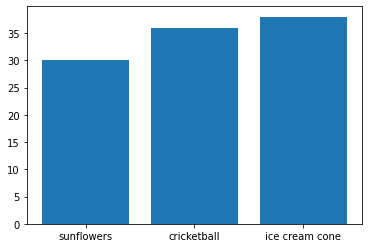

time: 145 ms (started: 2021-05-24 10:31:52 +00:00)


In [15]:
unique,count=np.unique(target,return_counts=True)
plt.bar(CATEGORIES,count)

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(flat_data,target,
                                               test_size=0.3,random_state=109)

time: 123 ms (started: 2021-05-24 10:31:53 +00:00)


In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [
              {'C':[1,10,100,1000],'kernel':['linear']},
              {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']},
]

svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

time: 1min 23s (started: 2021-05-24 10:31:53 +00:00)


In [18]:
y_pred =clf.predict(x_test)
y_pred

array([0, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 0, 0, 1, 2, 2, 1,
       1, 2, 0, 1, 1, 1, 1, 1, 1, 2])

time: 146 ms (started: 2021-05-24 10:33:16 +00:00)


In [19]:
y_test

array([0, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 0, 1, 0, 0, 1, 2, 2, 2,
       1, 2, 0, 0, 0, 1, 1, 1, 1, 2])

time: 4.86 ms (started: 2021-05-24 10:33:16 +00:00)


In [20]:
from sklearn.metrics import accuracy_score,confusion_matrix

time: 1.39 ms (started: 2021-05-24 10:33:16 +00:00)


In [21]:
accuracy_score(y_pred,y_test)

0.78125

time: 9.4 ms (started: 2021-05-24 10:33:16 +00:00)


In [22]:
confusion_matrix(y_pred,y_test)

array([[ 4,  0,  0],
       [ 3, 12,  4],
       [ 0,  0,  9]])

time: 5.85 ms (started: 2021-05-24 10:33:16 +00:00)


In [23]:
import pickle
pickle.dump(clf,open('img_model.p','wb'))

time: 46.2 ms (started: 2021-05-24 10:33:16 +00:00)


In [24]:
model =pickle.load(open('img_model.p','rb'))

time: 13.2 ms (started: 2021-05-24 10:33:16 +00:00)


enter your urlhttps://sstsports.com/wp-content/uploads/2020/04/leather-ball-white.jpg
(592, 615, 3)
PREDICTED OUTPUT: cricketball


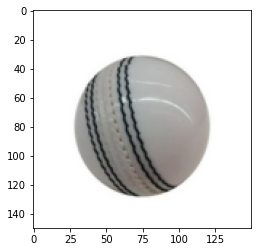

time: 1min 2s (started: 2021-05-24 10:33:37 +00:00)


In [26]:
flat_data= []
url = input('enter your url')
img = imread(url)
img_resized =resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data =np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out=model.predict(flat_data)
y_out=CATEGORIES[y_out[0]]
print(f'PREDICTED OUTPUT: {y_out}')